In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
data = pd.read_csv("Mastercard_stock_history.csv", 
                   index_col = "Date", parse_dates = ["Date"])
data.head()

/tmp/ipykernel_16113/1229077619.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("Mastercard_stock_history.csv",


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0
2006-01-06,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0


In [143]:
data = data.drop(["Dividends","Stock Splits"], axis=1)

In [144]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000
2006-01-06,4.179678,4.474572,4.176887,4.419686,62344000
...,...,...,...,...,...
2021-05-10,347.121403,348.130138,342.497240,342.776886,4724100
2021-06-10,339.580960,348.439763,338.682072,348.250000,3712000
2021-07-10,349.000000,357.899994,349.000000,353.910004,3209200


In [145]:
data.describe()

,Open,High,Low,Close,Volume
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08


In [146]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [147]:
#### can not randomly devide the dataset

In [148]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

In [149]:
tstart = 2016
tend = 2020

/tmp/ipykernel_16113/3427557351.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
/tmp/ipykernel_16113/3427557351.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)


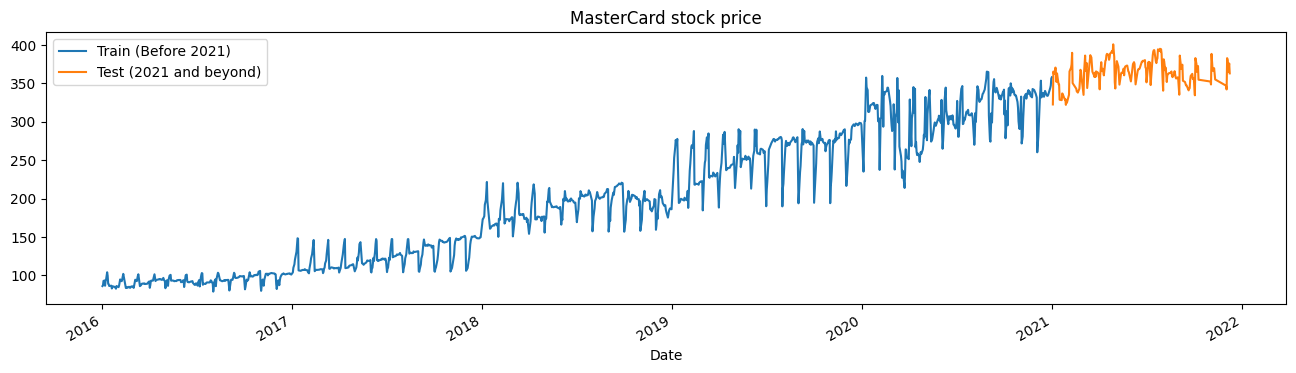

In [150]:
train_test_plot(data, tstart, tend)

In [151]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test

In [152]:
training_set , test_set = train_test_split(data, tstart, tend)

/tmp/ipykernel_16113/2530204431.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
/tmp/ipykernel_16113/2530204431.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test = dataset.loc[f"{tend+1}":, "High"].values


In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
sc = MinMaxScaler(feature_range = (0,1))

In [155]:
training_set = training_set.reshape(-1,1)

In [156]:
training_set_scaled = sc.fit_transform(training_set)

In [157]:
### example : [1,2,3,4,5,6,7,8,9,10,11,12]
### n_step = 3

#### 1,2,3, 4
#### 2,3,4, 5
#### 3,4,5, 6



In [158]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [159]:
n_steps = 60
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [160]:
X_train.shape

(1199, 60, 1)

In [161]:
y_train.shape

(1199, 1)

In [162]:
features = 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

In [163]:
X_train.shape

(1199, 60, 1)

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, GRU

In [165]:
model_lstm = Sequential()
model_lstm.add(Bidirectional(GRU(units = 128, return_sequences=True, activation = "tanh", input_shape = (60,1))))
model_lstm.add(Bidirectional(GRU(units=128)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer = "RMSprop", loss = "mse")


In [166]:
model_lstm.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 15s 214ms/step - loss: 0.0172
Epoch 2/25
38/38 [==============================] - 14s 375ms/step - loss: 0.0056
Epoch 3/25
38/38 [==============================] - 8s 198ms/step - loss: 0.0031
Epoch 4/25
38/38 [==============================] - 6s 170ms/step - loss: 0.0026
Epoch 5/25
38/38 [==============================] - 6s 167ms/step - loss: 0.0021
Epoch 6/25
38/38 [==============================] - 6s 157ms/step - loss: 0.0019
Epoch 7/25
38/38 [==============================] - 6s 160ms/step - loss: 0.0019
Epoch 8/25
38/38 [==============================] - 6s 162ms/step - loss: 0.0014
Epoch 9/25
38/38 [==============================] - 81s 2s/step - loss: 0.0015
Epoch 10/25
38/38 [==============================] - 8s 209ms/step - loss: 0.0011
Epoch 11/25
38/38 [==============================] - 70s 2s/step - loss: 0.0015
Epoch 12/25
38/38 [==============================] - 6s 168ms/step - loss: 0.0014
Epoch 13/25
38/38 [========

In [183]:
dataset_total = data.loc[:,"High"]

In [184]:
len(dataset_total)

3872

In [185]:
len(test_set)

195

In [186]:
inputs = dataset_total[3872-195-60 : ].values

In [187]:
inputs = inputs.reshape(-1,1)

In [188]:
inputs = sc.fit_transform(inputs)

In [189]:
X_test , y_test = split_sequence(inputs, n_steps)

In [190]:
X_test.shape

(195, 60, 1)

In [191]:
y_test.shape

(195, 1)

In [192]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1 )

In [193]:
predicted_stock_price = model_lstm.predict(X_test)

7/7 [==============================] - 0s 26ms/step


In [194]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [195]:
def plot_predictions(test, predicted):
    plt.figure(figsize = (10,5))
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

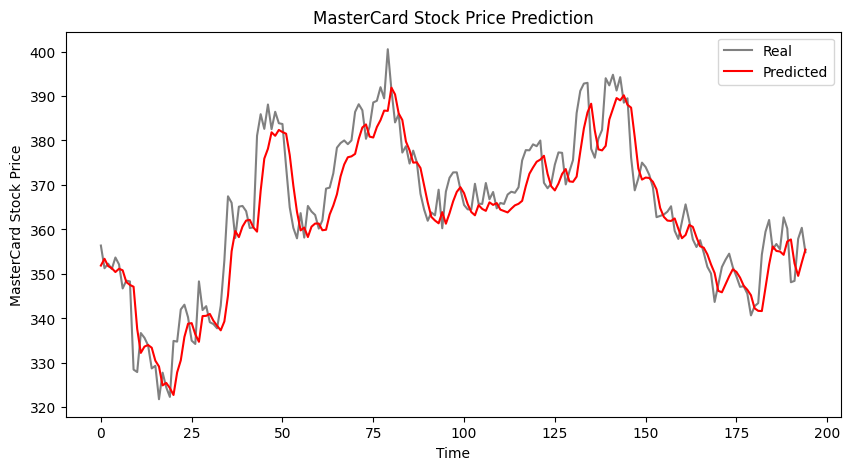

In [196]:
plot_predictions(test_set, predicted_stock_price)

In [205]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [206]:
mse = mean_squared_error(test_set, predicted_stock_price)
rmse = mse ** 0.5
print(rmse)

6.355118065659668


In [207]:
mae = mean_absolute_error(test_set, predicted_stock_price)
print(mae)

4.794057367608172
